In [92]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
from statsmodels . datasets import get_rdataset
from sklearn. decomposition import PCA
from sklearn. preprocessing import StandardScaler
from ISLP import load_data

In [93]:
from sklearn.cluster import \
(KMeans ,
AgglomerativeClustering )
(dendrogram ,
cut_tree )
from ISLP.cluster import compute_linkage

In [94]:
USArrests = get_rdataset ('USArrests').data
USArrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [95]:
USArrests .columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [96]:
USArrests .mean ()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [97]:
USArrests.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [98]:
#mise à lechelle/ standarise 
scaler = StandardScaler(with_std =True , with_mean =True)
USArrests_scaled = scaler.fit_transform (USArrests)


In [99]:
#transfrome les centre des vb avec moyenne =0, maisq ne standarise pas 


pcaUs=PCA() #crée un objet PCA vide
pcaUs.fit(USArrests_scaled) # entraine sur nos données 


,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [100]:
#apres fit, calcul des mean des vb 
pcaUs.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

In [101]:
scores = pcaUs. transform ( USArrests_scaled )

In [102]:
#principal component loading
pcaUs. components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

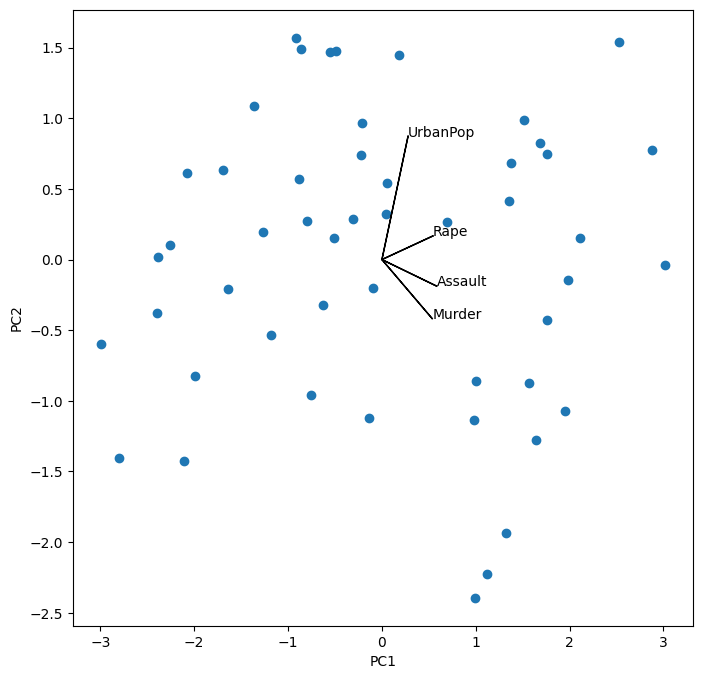

In [103]:
#biplot viz 
i, j = 0,1
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d'% (i+1))
ax.set_ylabel('PC%d'%(j+1))
for k in range (pcaUs.components_.shape[1]):
    ax.arrow (0, 0, pcaUs. components_ [i,k], pcaUs. components_ [j,k])
    ax.text(pcaUs. components_ [i,k],
        pcaUs. components_ [j,k],
        USArrests .columns[k])

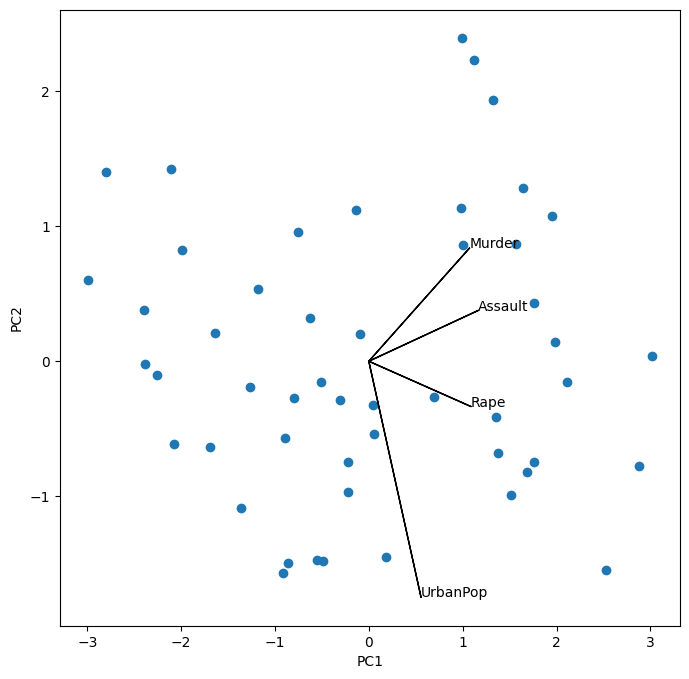

In [104]:
#vceteur flèche 
scale_arrow= s_ =2

scores[:,1]*= -1 
pcaUs.components_[1] *=-1 #flip the y-axis 

#graphe
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.scatter(scores[:,0], scores[:,1]) #tracer des points 
ax.set_xlabel('PC%d'%(i+1)) #les axes 
ax.set_ylabel('PC%d'% (j+1))

for k in range (pcaUs.components_.shape[1]): #pcaUS... contient les vecturs propres 
    ax.arrow(0,0, #depuis l'origine 0,
             s_*pcaUs.components_[i,k], s_*pcaUs.components_[j,k]
             )
    ax.text(s_*pcaUs.components_[i,k],
            s_*pcaUs.components_[j,k],
            USArrests.columns[k])

In [105]:
#standar dev de PCA 
# 0 -> calcul de sd col / col 
#ddof -> deg of freedoom 
scores.std(0,ddof=1)

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [106]:
# variance de chaque 
PCA=pcaUs.explained_variance_

In [107]:
#PCA = explain 62% of variance
#NCA = 24% of variance ... 
pcaUs. explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

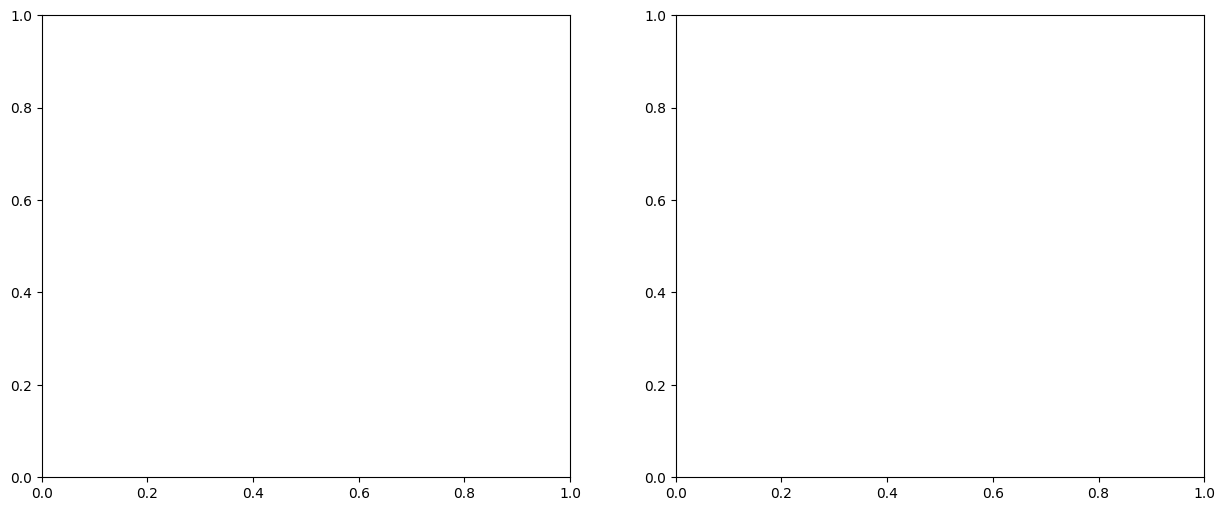

In [108]:
#plot du PVE 

##%%capture #suppresses the displaying of the partially
fig, axes = plt.subplots(1,2, figsize=(15,6))
ticks=np.arange(pcaUs.n_components_)+1
ax.plot(ticks, pcaUs.explained_variance_ratio_, marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Proport° of var explained')
ax.set_ylim ([0 ,1])
ax. set_xticks (ticks)

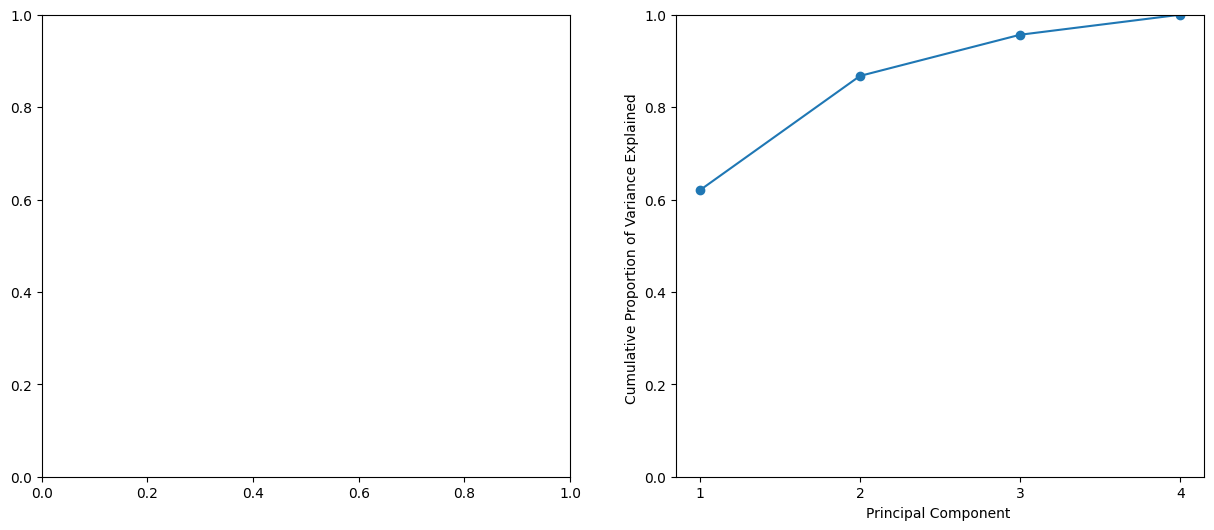

In [109]:
ax = axes [1]
#on trace la courbe cumulée de la var expl au tot (cumsum) ici je garde les 2 premieres expliquent 90% 
ax.plot(ticks,
    pcaUs. explained_variance_ratio_ .cumsum (),
    marker='o')
ax. set_xlabel ('Principal Component ')
ax. set_ylabel ('Cumulative Proportion of Variance Explained ')
ax. set_ylim ([0, 1])
ax. set_xticks (ticks)
fig

In [110]:
a = np.array ([1 ,2 ,8 , -3])
np.cumsum(a)

array([ 1,  3, 11,  8])

In [111]:
#décomposition en valeur singulière X= UDVT
# U(idv dsl'esp)
# D(vect des val singulières)
# VT (mat des vect prapres)
X=USArrests_scaled
U,D,V = np.linalg.svd(X,full_matrices=False)
U.shape,D.shape, V.shape

((50, 4), (4,), (4, 4))

In [112]:
#creation de matrice du PCA 
V

array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [113]:
pcaUs. components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [-0.6492278 ,  0.74340748, -0.13387773, -0.08902432]])

In [117]:
#U = standarized v of PCA 
#on obtient les scores PCA (coordonées des idv sur les 3 premiers axes)
(U * D[None ,:]) [:3]
scores [:3]

array([[ 0.98556588,  1.13339238, -0.44426879, -0.15626714],
       [ 1.95013775,  1.07321326,  2.04000333,  0.43858344],
       [ 1.76316354, -0.74595678,  0.05478082,  0.83465292]])

In [ ]:
#simulation de 20 valeurs manquantes 
n_omit = 20
np.random.seed (15)

#indice de lignes a affecter (obs)
r_idx = np.random.choice(np.arange(X.shape [0]) ,
                         n_omit ,
                         replace=False)

#indice de colonne a affecter (vb)
c_idx = np.random.choice(np.arange(X.shape [1]) ,
                         n_omit ,
                         replace=True)
#copie de matrice, @introduction des valeurs manquantes 
# but = tester des algo d'imputation, tester robustess PCA face nan
Xna = X.copy ()
Xna[r_idx , c_idx] = np.nan

In [ ]:
#fct qui prends la matrix, et retourne une approx avce svd

def low_rank (X, M=1):
    #calcul de la svd de X
    U, D, V = np.linalg.svd(X)
    #prends les M premières colonne de U (n,m) *D[j]
    L = U[:,:M] * D[None ,:M]
    
    return L.dot(V[:M])

In [ ]:
#Step 1 
#remplacer les nan par mean col (npnanmean())
Xhat = Xna.copy ()
Xbar = np.nanmean(Xhat , axis =0) #calc moy / col
Xhat[r_idx , c_idx] = Xbar[c_idx] #matrice reconsrtruite 

In [122]:
#critère de convergence 
thresh = 1e-7 #seuil d'arret (erreur relative)
rel_err = 1.  #erreur relat actuelle 
count = 0.    #compteur d'iteration 

#calcul de l'erreur 
ismiss = np.isnan(Xna) # boleen si Xna contient de nan 
mssold = np.mean(Xhat[~ismiss ]**2) #ismiss=nonmanquant, moyenne des ^2 des val obs Xhat
mss0 = np.mean(Xna[~ismiss ]**2) #mss0 moy carrés des val obs initialemenr ds Xna ini

In [125]:
#tant que l'err relat pas assez petit 
while rel_err > thresh:
    count += 1
# Step 2(a)

#construire une version "propre" de la matrice 
# Step 2(b)
    Xapp = low_rank (Xhat , M=1) #approx de matrice de rang 1
    Xhat[ismiss] = Xapp[ismiss] #nan remplacées 

# Step 2(c)calcul de l'erreur 
    mss = np.mean ((( Xna - Xapp)[~ismiss ]) **2) #MSS 
    rel_err = (mssold - mss) / mss0
    mssold = mss

print(" Iteration : {0}, MSS :{1:.3f}, Rel.Err {2:.2e}"
    .format(count , mss , rel_err))

#MSS = 0.381 => + c petite mieux c
# =  diffe moy entre matrtice reel et reconstruite 

 Iteration : 9.0, MSS :0.381, Rel.Err 2.95e-08


In [127]:

#correlation betw 20 imputed values 
np. corrcoef (Xapp[ismiss], X[ismiss ])[0 ,1]

#0.71 + ou - proche 1 (=corré parfaite)

np.float64(0.7113567434297361)

In [ ]:
#Clustering 
#2*25obs basé sur le rdm 
np.random.seed (0) #controle le générat° de donnée
X = np.random. standard_normal ((50 ,2)) #matrice 50*2
X[:25 ,0] += 3 #premieres 25 lignes
X[:25 ,1] -= 4 #deux` 25 lignes 

In [ ]:
#perform K-means with K=2
#use fct kmeans
kmeans = KMeans( n_clusters =2, #2clusters 0 ou 1 
random_state =2,#initiliasation reproducrtible 
n_init =20).fit(X) #lance l'algo 20 * 

In [131]:
kmeans.labels_ #vect de t 50, contenant 0 ou 1 chq ptn 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

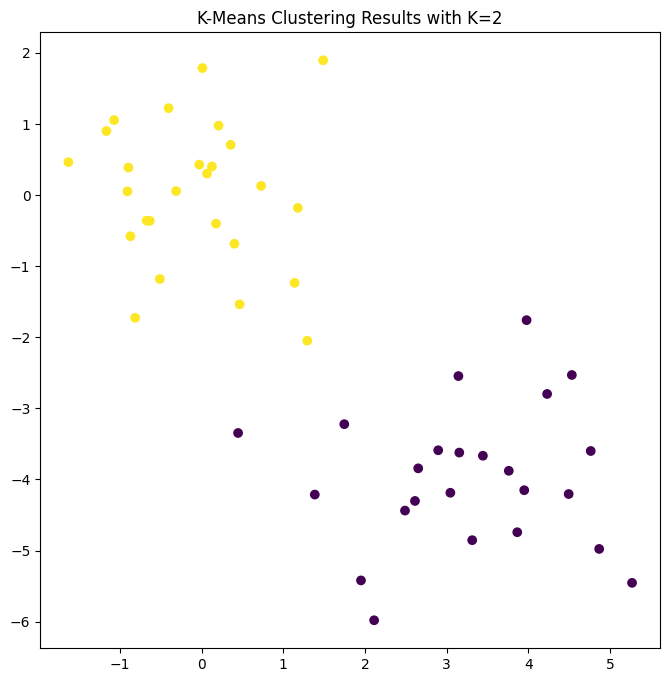

In [132]:
fig , ax = plt. subplots (1, 1, figsize =(8 ,8)) #on plot notre fig X
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_) #fixe des abs et ordonnées, color selon le cluster 
ax. set_title ("K-Means Clustering Results with K=2")

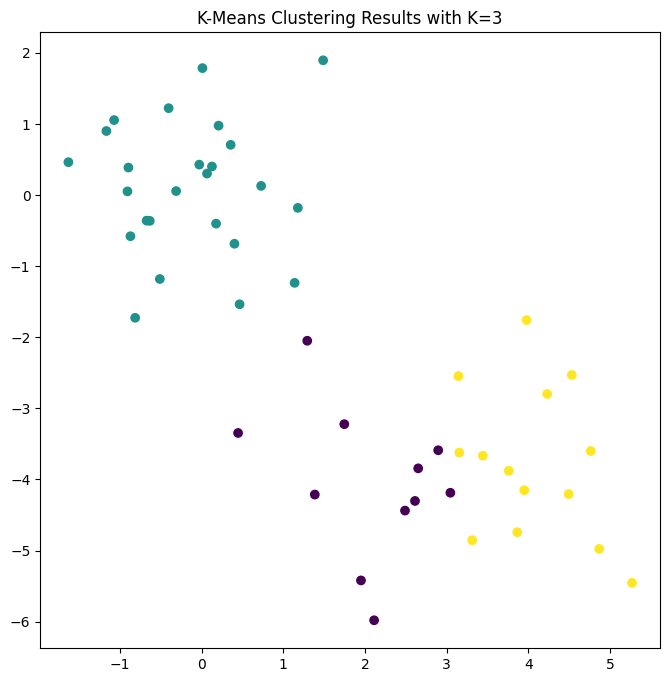

In [133]:
kmeans = KMeans( n_clusters =3,
random_state =3,
n_init =20).fit(X)
fig , ax = plt. subplots (figsize =(8 ,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax. set_title ("K-Means Clustering Results with K=3");

In [135]:
kmeans1 = KMeans( 
    n_clusters =3,
    random_state =3,
    n_init =1
).fit(X)

kmeans20 = KMeans( 
    n_clusters =3,
    random_state =3,
    n_init =20
).fit(X)

kmeans1.inertia_ , kmeans20 . inertia_

#inertie => somme des dist *2 entre chq ptn et le centroide de son cluster 
#au bout de 1 puis 20 ini (2ème version meilleur partition)

(76.85131986999252, 75.06261242745384)

In [137]:
#Hierarchical Clustering 
HClust = AgglomerativeClustering
hc_comp = HClust( 
    distance_threshold =0,
    n_clusters =None ,
    linkage='complete'
) #distance la plus éloigné entre les ptn les + éloignés 

hc_comp.fit(X)


,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'complete'
,distance_threshold,0
,compute_distances,False


In [140]:
#moyenne  des dist entre tous les ptn des 2 cllsters 
hc_avg = HClust( distance_threshold =0,
    n_clusters =None ,
    linkage='average')
hc_avg.fit(X)

#deux ptn les plus prhce 
hc_sing = HClust( distance_threshold =0,
n_clusters =None ,
linkage='single')
hc_sing.fit(X)

,n_clusters,None
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'single'
,distance_threshold,0
,compute_distances,False


In [143]:
#crée manuellement la matrice des dist eucliedienne 
D = np.zeros ((X.shape [0], X.shape [0]))

for i in range(X.shape [0]):
    x_ = np. multiply .outer(np.ones(X.shape [0]) , X[i]) #on parcourt 
    D[i] = np.sqrt(np.sum ((X - x_)**2, 1))
    
hc_sing_pre = HClust( distance_threshold =0,
    n_clusters =None ,
    metric='precomputed',
    linkage='single')

hc_sing_pre .fit(D)

,n_clusters,None
,metric,'precomputed'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'single'
,distance_threshold,0
,compute_distances,False


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [80.0, 80.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [160.0, 160.0, 190.0, 190.0],
  [140.0, 140.0, 175.0, 175.0],
  [95.0, 95.0, 157.5, 157.5],
  [28.125, 28.125, 126.25, 126.25],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [252.5, 252.5, 280.0, 280.0],
  [222.5, 222.5, 266.25, 266.25],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [335.0, 335.0, 345.0, 345.0],
  [375.0, 375.0, 385.0, 38

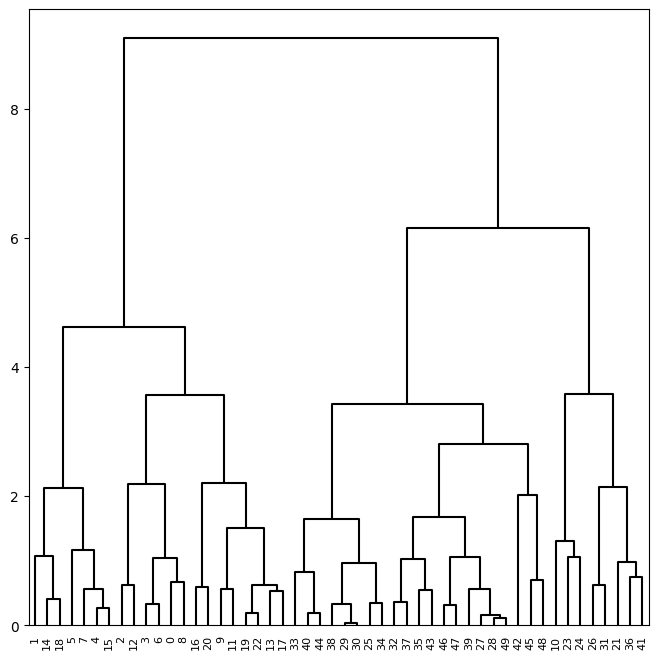

In [165]:
cargs = {'color_threshold':-np.inf ,
'above_threshold_color':'black'} #fixe la couleur et le seuil 

linkage_comp = compute_linkage (hc_comp) #matrice de liaison
fig , ax = plt. subplots (1, 1, figsize =(8, 8))

dendrogram(linkage_comp,  # création de larbre hierarchique 
ax=ax ,
** cargs)

#chaque branche représente la fusion progressive des observations en clusters,

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [12.5, 12.5, 43.75, 43.75],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [80.0, 80.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [160.0, 160.0, 190.0, 190.0],
  [140.0, 140.0, 175.0, 175.0],
  [95.0, 95.0, 157.5, 157.5],
  [28.125, 28.125, 126.25, 126.25],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [252.5, 252.5, 280.0, 280.0],
  [222.5, 222.5, 266.25, 266.25],
  [295.0, 295.0, 305.0, 305.0],
  [315.0, 315.0, 325.0, 325.0],
  [300.0, 300.0, 320.0, 320.0],
  [335.0, 335.0, 345.0, 345.0],
  [375.0, 375.0, 385.0, 38

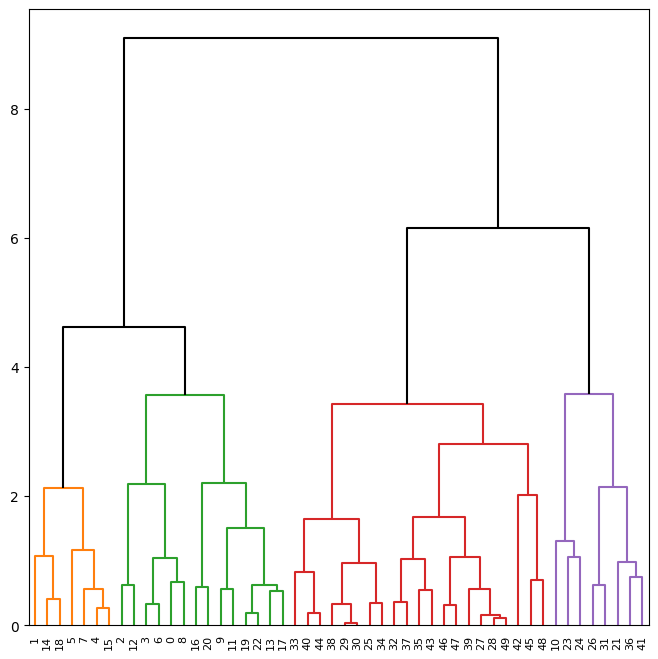

In [149]:
fig , ax = plt. subplots (1, 1, figsize =(8, 8))
dendrogram(linkage_comp ,
    ax=ax ,
    color_threshold =4,
    above_threshold_color ='black') #4couleur 

In [150]:
#coupe le dendrogramme
cut_tree (linkage_comp , n_clusters =4).T

array([[0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2,
        0, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
        3, 3, 3, 3, 3, 3]])

In [164]:
#mtn on en veut 5 
cut_tree (linkage_comp , height =5)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]])

Text(0.5, 1.0, ' Hierarchical Clustering with Scaled Features')

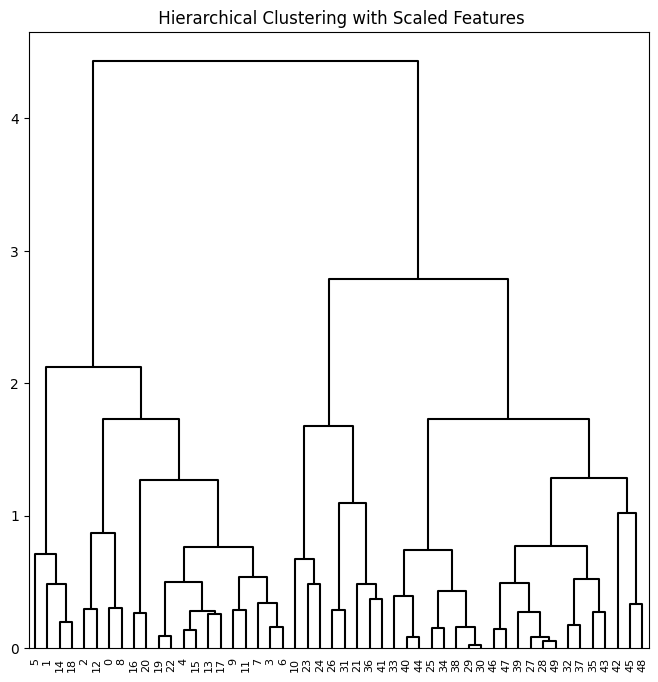

In [ ]:
scaler = StandardScaler ()
X_scale = scaler. fit_transform (X)
hc_comp_scale = HClust( distance_threshold =0,
n_clusters =None ,
linkage='complete').fit(X_scale)

linkage_comp_scale = compute_linkage ( hc_comp_scale )
fig , ax = plt. subplots (1, 1, figsize =(8, 8))
dendrogram ( linkage_comp_scale , ax=ax , ** cargs)
ax. set_title (" Hierarchical Clustering with Scaled Features")

Text(0.5, 1.0, ' Complete Linkage with Correlation -Based Dissimilarity')

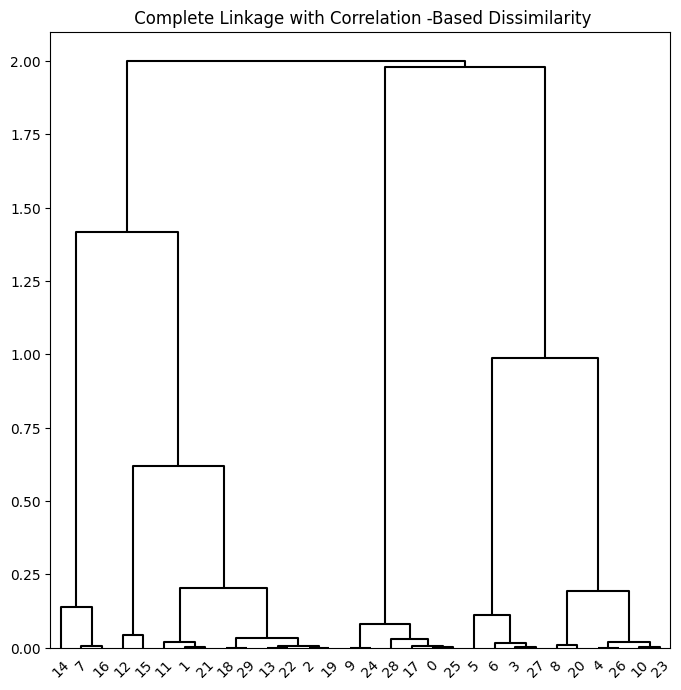

In [154]:
X = np.random. standard_normal ((30 , 3))
corD = 1 - np. corrcoef (X)
hc_cor = HClust(linkage='complete',
distance_threshold =0,
n_clusters =None ,
metric='precomputed')
hc_cor.fit(corD)
linkage_cor = compute_linkage (hc_cor)
fig , ax = plt. subplots (1, 1, figsize =(8, 8))
dendrogram (linkage_cor , ax=ax , ** cargs)
ax. set_title (" Complete Linkage with Correlation -Based Dissimilarity")

In [163]:
NCI60 = load_data ('NCI60')
nci_labs = NCI60['labels']
nci_data = NCI60['data']

In [157]:
nci_data .shape

(64, 6830)

In [162]:
nci_labs . value_counts ()

label      
NSCLC          9
RENAL          9
MELANOMA       8
BREAST         7
COLON          7
LEUKEMIA       6
OVARIAN        6
CNS            5
PROSTATE       2
K562A-repro    1
K562B-repro    1
MCF7A-repro    1
MCF7D-repro    1
UNKNOWN        1
Name: count, dtype: int64

In [166]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler () #centre les données moy =0 et sd = 1 
nci_scaled = scaler. fit_transform (nci_data) #apprend et transforme (centrer et reduire) des datas
#nci scaled = tab standarisé (m=0, et v=1)
nci_pca = PCA() #creat° du PCA 
nci_scores = nci_pca. fit_transform (nci_scaled) #calcul axes ppaux (vect propres, variance expliqués)

Text(0, 0.5, 'PC3')

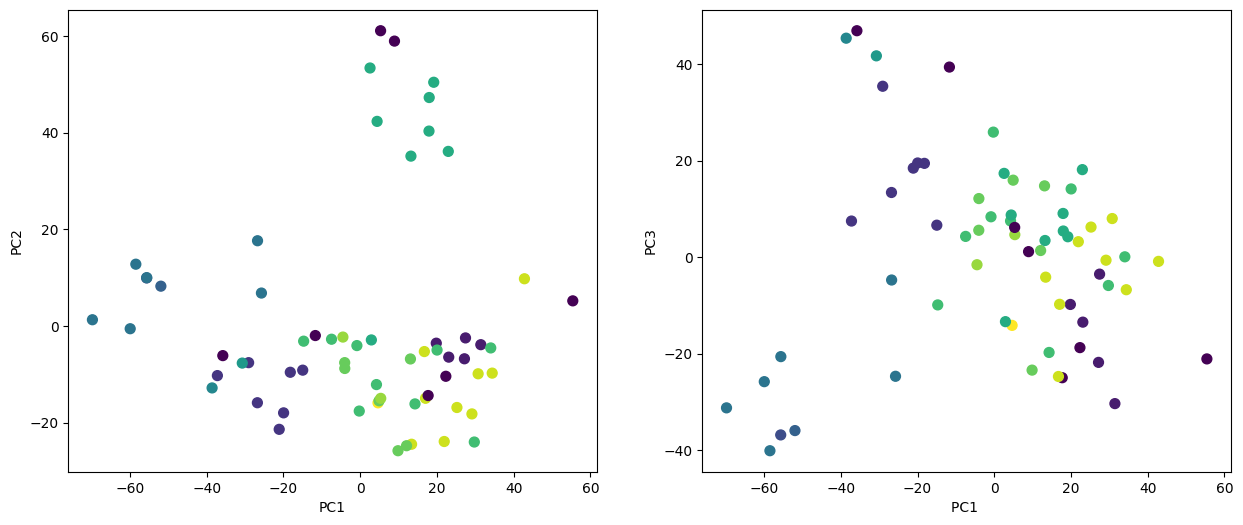

In [169]:
cancer_types = list(np.unique(nci_labs ))
nci_groups = np.array ([ cancer_types .index(lab)
                        for lab in nci_labs .values ])

fig , axes = plt. subplots (1, 2, figsize =(15 ,6))
ax = axes [0]
ax.scatter( nci_scores [:,0],
            nci_scores [:,1],
            c=nci_groups ,
            marker='o',
            s=50)

ax. set_xlabel ('PC1'); ax. set_ylabel ('PC2')
ax = axes [1]
ax.scatter( nci_scores [:,0],
            nci_scores [:,2],
            c=nci_groups ,
            marker='o',
            s=50)

ax. set_xlabel ('PC1 '); ax. set_ylabel ('PC3')

Text(0, 0.5, 'Cumulative PVE ')

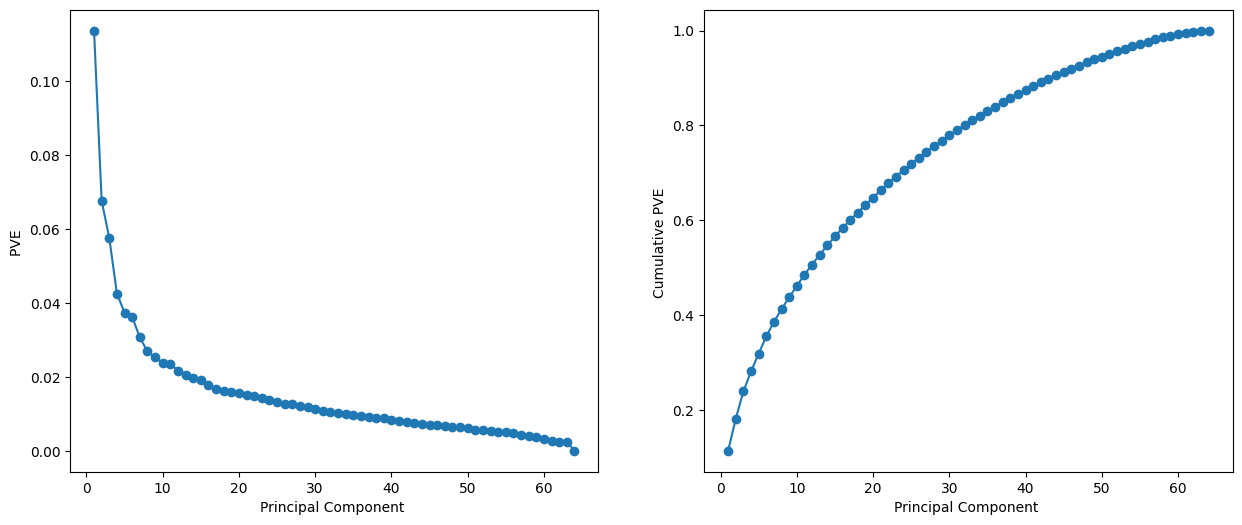

In [172]:
#regoupement hierarchique (couplages ≠)
#obj : regarder si obs se regroupent en ≠ type de cancer 
# dist euclidienne use as mesure de dissimilarité 

fig , axes = plt. subplots (1, 2, figsize =(15 ,6))
ax = axes [0]
ticks = np.arange(nci_pca. n_components_ )+1
ax.plot(ticks ,
nci_pca. explained_variance_ratio_ ,
marker='o')
ax. set_xlabel ('Principal Component ');
ax. set_ylabel ('PVE ')
ax = axes [1]
ax.plot(ticks ,
nci_pca. explained_variance_ratio_ .cumsum (),
marker='o');
ax. set_xlabel ('Principal Component ')
ax. set_ylabel ('Cumulative PVE ')

#explain 100% of variance 

In [ ]:
def plot_nci (linkage , ax , cut=-np.inf): #3 elfm, ML, axe du den, seuil de coupure 
    cargs = {'above_threshold_color':'black', #couleur de branche 
        'color_threshold':cut} #seuil pr colorer 
    
    hc = HClust( n_clusters =None , #clustering hierarchique, creation de l'obj
                distance_threshold =0, #regp jusqu'a ce que dist = 0 
                linkage=linkage.lower ()).fit( nci_scaled ) #methode de liaison 
    
    linkage_ = compute_linkage (hc) #fonction, matrice de liaison 
    dendrogram(linkage_ ,
                ax=ax ,
                labels=np.asarray( nci_labs ), #nb des obs a afficher 
                leaf_font_size =10, #taille police etiquettes 
                ** cargs)
    
    ax. set_title ('%s Linkage' % linkage)
    return hc

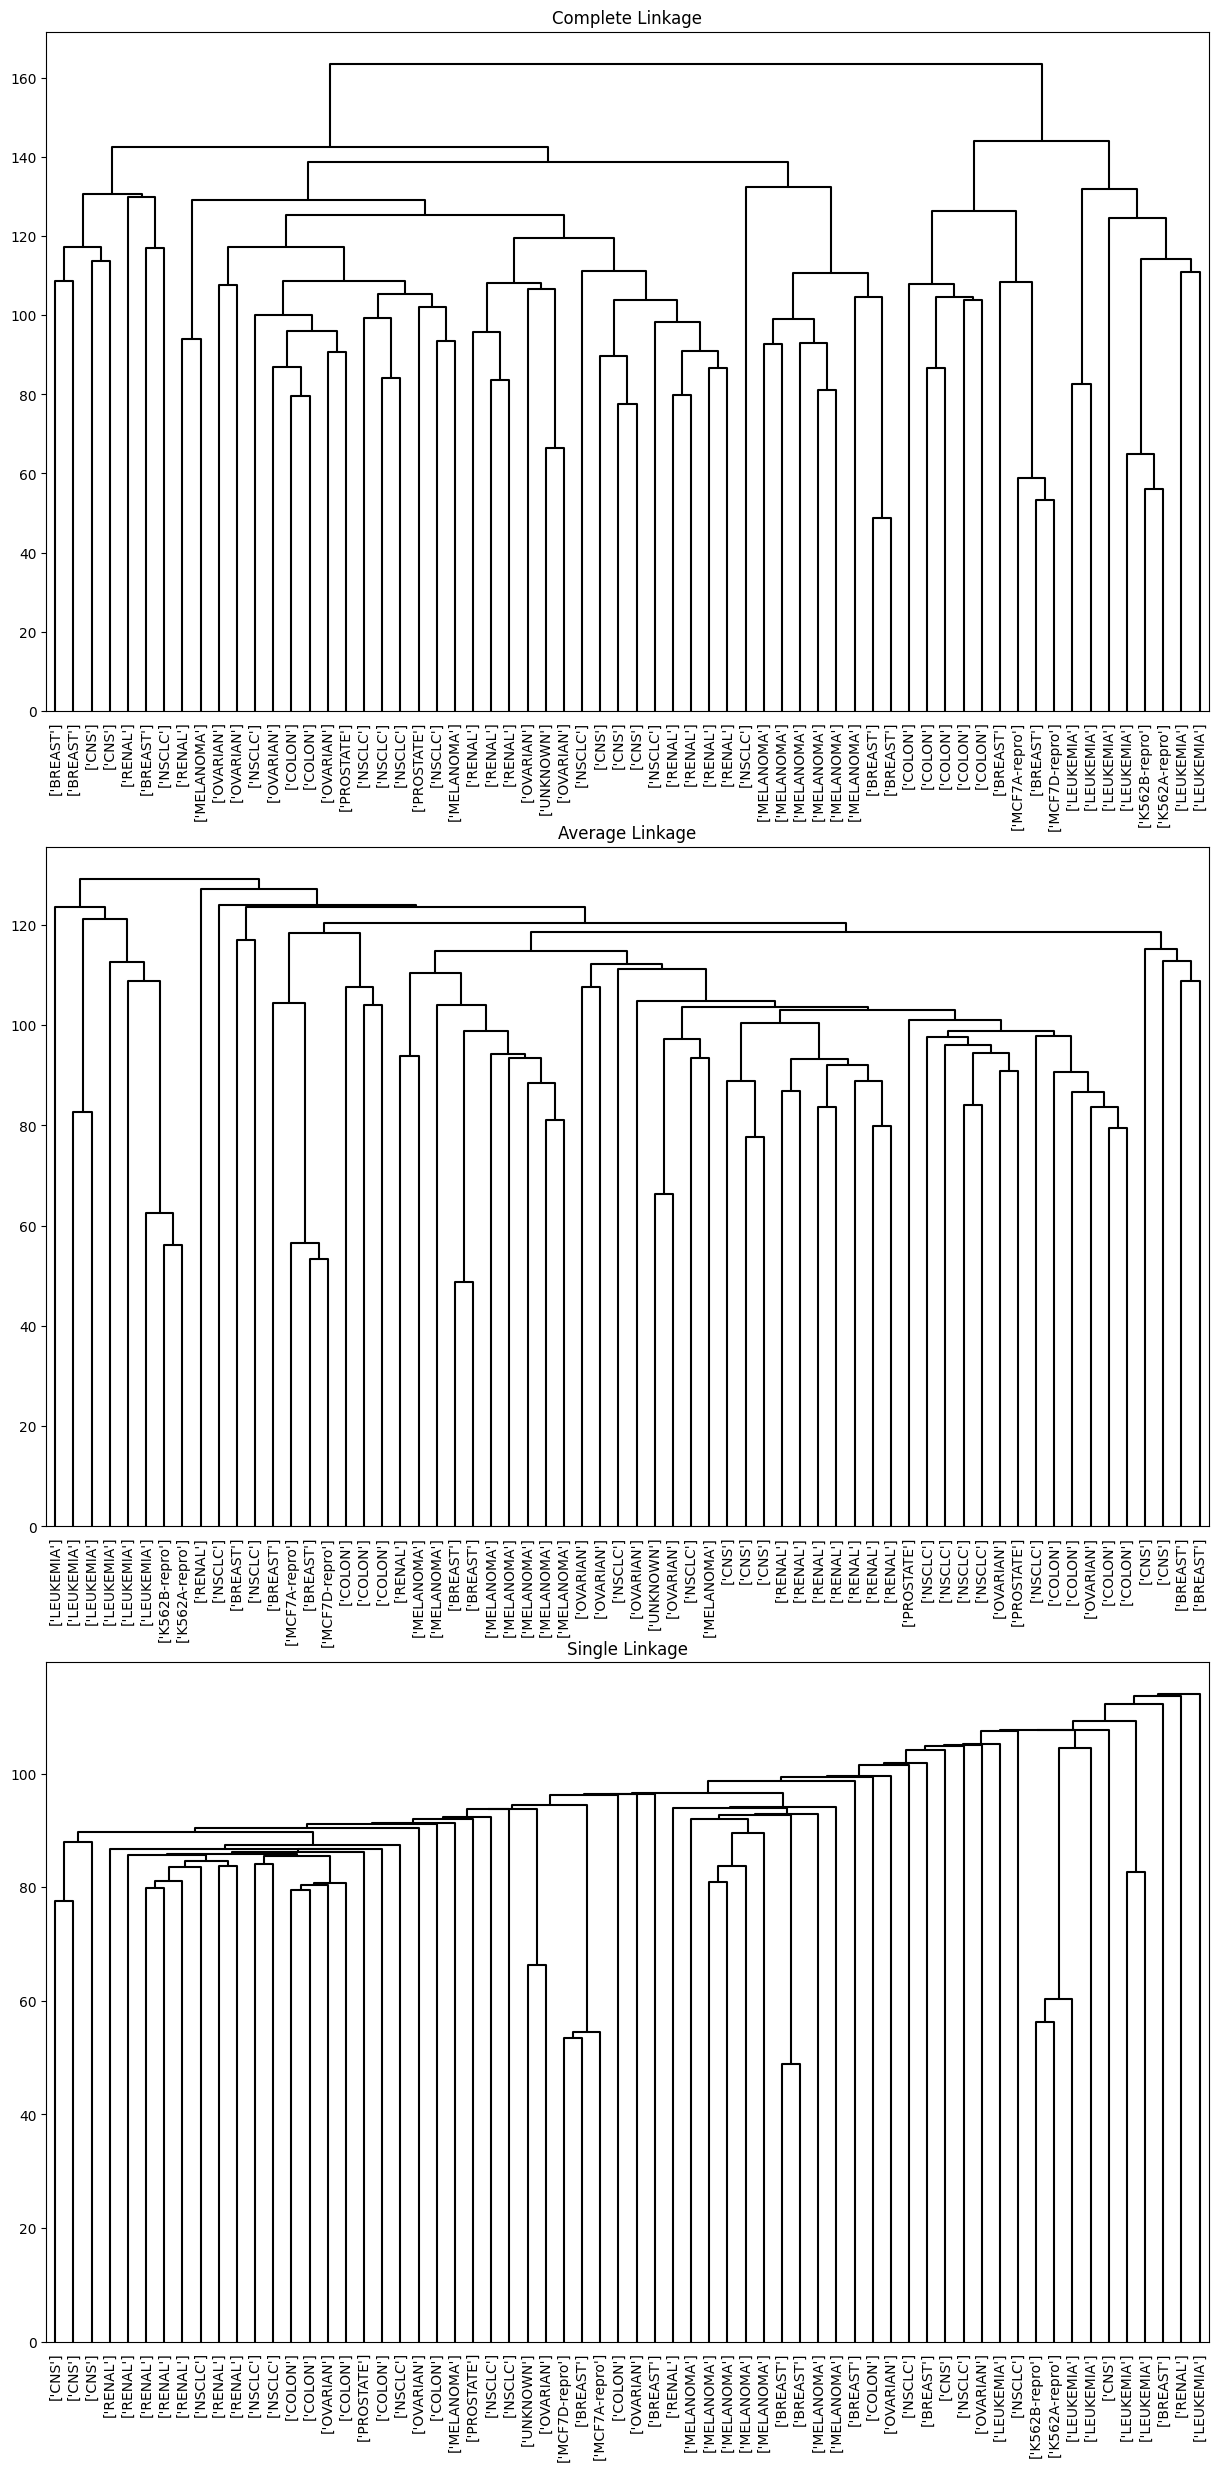

In [181]:
fig , axes = plt. subplots (3, 1, figsize =(15 ,30))
ax = axes [0]; hc_comp = plot_nci ('Complete', ax)
ax = axes [1]; hc_avg = plot_nci ('Average', ax)
ax = axes [2]; hc_sing = plot_nci ('Single', ax)

In [183]:
linkage_comp = compute_linkage (hc_comp)
comp_cut = cut_tree (linkage_comp , n_clusters =4).reshape (-1)
pd. crosstab ( nci_labs ['label'],
pd.Series( comp_cut .reshape (-1), name='Complete'))

Complete,0,1,2,3
label,,,,
BREAST,2,3,0,2
CNS,3,2,0,0
COLON,2,0,0,5
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,0,0,6,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,8,0,0,0


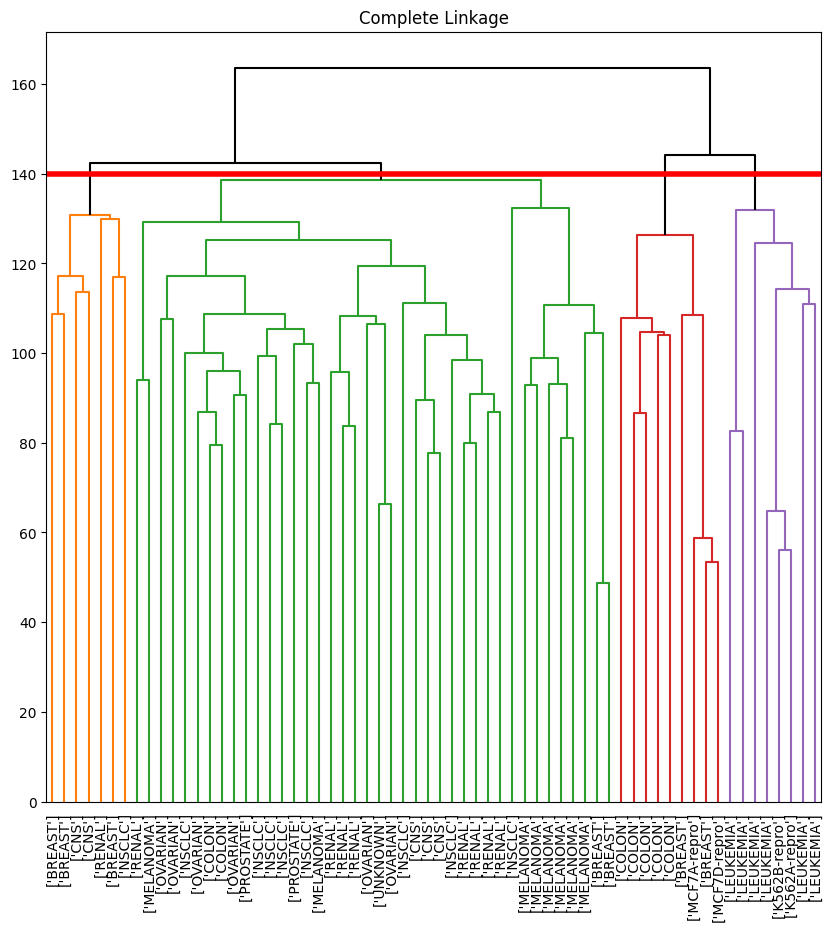

In [184]:
fig , ax = plt. subplots (figsize =(10 ,10))
plot_nci ('Complete', ax , cut =140)
ax.axhline (140 , c='r', linewidth =4); #crée la ligne horizontale 

In [185]:
nci_kmeans = KMeans( n_clusters =4,
random_state =0,
n_init =20).fit( nci_scaled )
pd. crosstab (pd.Series(comp_cut , name='HClust '),
pd.Series( nci_kmeans .labels_ , name='K-means '))

K-means,0,1,2,3
HClust,,,,
0,1,20,10,9
1,0,7,0,0
2,8,0,0,0
3,0,0,9,0


Complete -PCA,0,1,2,3
label,,,,
BREAST,0,5,0,2
CNS,2,3,0,0
COLON,7,0,0,0
K562A-repro,0,0,1,0
K562B-repro,0,0,1,0
LEUKEMIA,2,0,4,0
MCF7A-repro,0,0,0,1
MCF7D-repro,0,0,0,1
MELANOMA,1,7,0,0


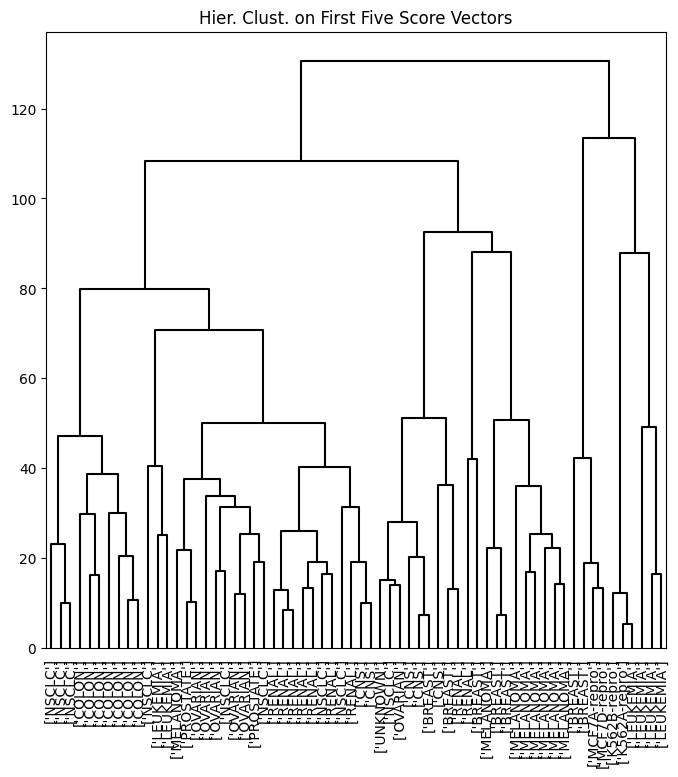

In [187]:
hc_pca = HClust( n_clusters =None ,
distance_threshold =0,
linkage='complete'
).fit( nci_scores [: ,:5])
linkage_pca = compute_linkage (hc_pca)
fig , ax = plt. subplots (figsize =(8 ,8))
dendrogram (linkage_pca ,
labels=np.asarray( nci_labs ),
leaf_font_size =10,
ax=ax ,
** cargs)
ax. set_title ("Hier. Clust. on First Five Score Vectors")
pca_labels = pd.Series(cut_tree (linkage_pca ,
n_clusters =4).reshape (-1),
name='Complete -PCA')
pd. crosstab ( nci_labs ['label'], pca_labels )